<div id='id0' />

# Análisis exploratorio de la variable de superficie cultivada en EEUU
Este notebook tiene como finalidad el análisis univariante de la variable de Superficie cultivada.

1. [Análisis de la variable de Superficie](#id1)
    - [Superficie media cultivada por estado desde 1950 a 2021](#id2)
    - [Evolución anual](#id3)
    - [Evolución anual de superficie cultivada para cada estado](#id4)
    - [Evolución anual de superficie cultivada para cada cultivo](#id5)
    - [Estudio de la distribución](#id6)
    - [Evolución de temperatura por año y estado representado en el mapa de EEUU](#id7)
2. [Conclusiones](#id8)


In [33]:
#--BASE--#
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import datetime
import os

#--VISUALIZACIÓN--#
import matplotlib as mpl
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

#--CONFIGURACIÓN--#
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

[up](#id0)

<div id='id1' />

# Análisis de la variable de Superficie

In [34]:
df = pd.read_excel('../DATOS/API_superficie_cultivada/TOTAL/TOTAL.xlsx')

In [35]:
df.head(2)

,commodity_desc,state_name,year,hectare
0,ALMONDS,CALIFORNIA,1996,173205.61
1,ALMONDS,CALIFORNIA,2007,258999.04


[up](#id0)

<div id='id2' />

## Superficie media cultivada por estados desde 1950 a 2021

In [36]:
fig = px.bar(
    pd.DataFrame(df.groupby('state_name')['hectare'].mean()).sort_values(by = 'hectare', ascending=False),
    title='Superficie media en cada estado desde 1950 hasta 2021')
fig.update_yaxes(title_text='Superficie (ha)')
fig.update_xaxes(title_text='')
fig.show() 

[up](#id0)

<div id='id3' />

## Evolución anual

In [37]:

fig = px.scatter(
    pd.DataFrame(df.groupby('year')['hectare'].sum()),
    title='Evolución de la superfice de cultivo', 
    trendline='lowess'
    )
fig.update_yaxes(title_text='Superficie (ha)')
fig.update_xaxes(title_text='')
fig.show()  

[up](#id0)

<div id='id4' />

## Evolución anual de superficie cultivada para cada estado

In [38]:
Sup1 = pd.DataFrame(df.groupby(['state_name', 'year'])['hectare'].sum())
Sup1.reset_index(inplace = True)
Sup1.head()

,state_name,year,hectare
0,ALABAMA,1950,2017116.90
1,ALABAMA,1951,1993119.02
2,ALABAMA,1952,1993887.92
3,ALABAMA,1953,1977012.52
4,ALABAMA,1954,1899757.96


In [39]:
fig = px.line(Sup1, x = 'year', y = 'hectare', color = 'state_name')
fig.update_yaxes(title_text='Superficie (ha)')
fig.update_xaxes(title_text='')
fig.show()

Representación de los estados con mayor superficie

In [40]:
state_importance = df[df['year'] == 2021]
state_importance = state_importance.groupby('state_name').sum().sort_values(by = 'hectare', ascending = False)
total = state_importance['hectare'].sum().round(2)

In [41]:
state_importance['percentage'] = state_importance['hectare'] / total
state_importance.head(15)

,year,hectare,percentage
state_name,,,
NORTH DAKOTA,32336,9443311.39,0.08
IOWA,8084,9386691.77,0.08
ILLINOIS,16168,9068487.17,0.08
KANSAS,20210,8830653.21,0.08
MINNESOTA,28294,7636473.38,0.07
NEBRASKA,24252,7075933.09,0.06
TEXAS,42441,7036356.42,0.06
SOUTH DAKOTA,22231,5827478.40,0.05
INDIANA,12126,4627301.13,0.04


In [42]:
state_importance[:15].sum()

year           420368.00
hectare      88479482.31
percentage          0.79
dtype: float64

[up](#id0)

<div id='id5' />

## Evolución anual de superficie cultivada para cada cultivo

In [43]:
Sup2 = pd.DataFrame(df.groupby(['commodity_desc', 'year'])['hectare'].sum())
Sup2.reset_index(inplace = True)
Sup2.head()

,commodity_desc,year,hectare
0,ALMONDS,1996,173205.61
1,ALMONDS,2007,258999.04
2,ALMONDS,2008,287327.06
3,ALMONDS,2009,303514.50
4,ALMONDS,2010,311608.22


In [44]:
fig = px.line(Sup2, x = 'year', y = 'hectare', color = 'commodity_desc')
fig.update_yaxes(title_text='Superficie (ha)')
fig.update_xaxes(title_text='')
fig.show()

Veamos ahora que porcentaje ocupan los cultivos más representativos de la gráfica sobre el total de superficie cultivada

In [45]:
crop_importance = df[df['year'] == 2021]
crop_importance = crop_importance.groupby('commodity_desc').sum().sort_values(by = 'hectare', ascending = False)
total = crop_importance['hectare'].sum().round(2)

In [46]:
crop_importance['percentage'] = crop_importance['hectare'] / total
crop_importance

,year,hectare,percentage
commodity_desc,,,
CORN,97008,37737778.87,0.34
SOYBEANS,60630,35286595.77,0.31
WHEAT,74777,18915023.64,0.17
COTTON,34357,4538755.83,0.04
SORGHUM,12126,2956231.23,0.03
...,...,...,...
APRICOTS,4042,3023.00,0.00
COFFEE,2021,2913.74,0.00
ARTICHOKES,2021,1982.96,0.00


In [47]:
crop_importance[:3].sum()

year           232415.00
hectare      91939398.28
percentage          0.82
dtype: float64

[up](#id0)

<div id='id6' />

## Estudio de la distribución

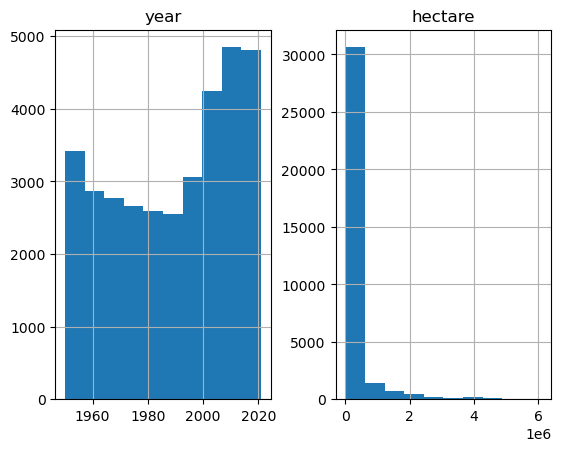

In [48]:
df.hist();

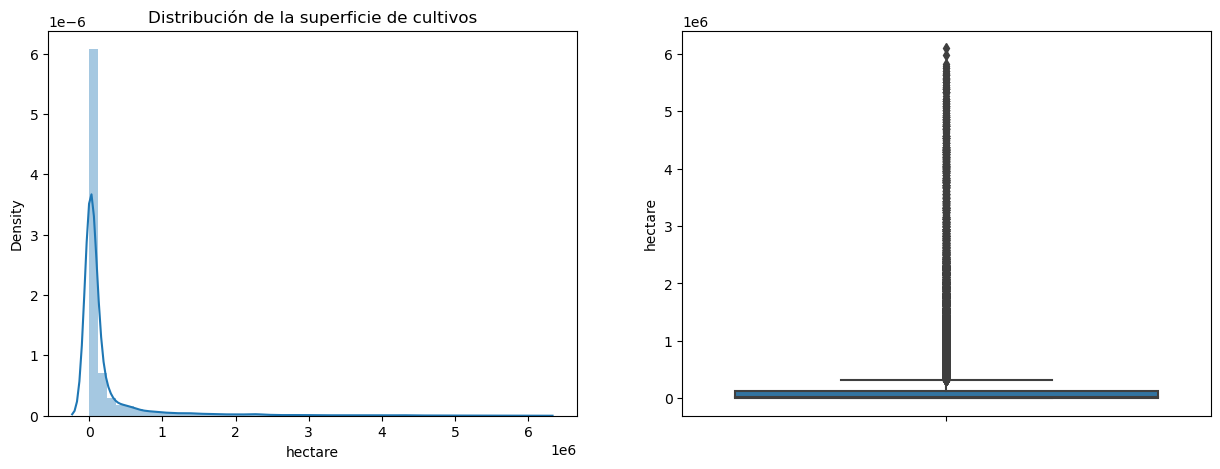

In [49]:
fig, ax =plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['hectare'], ax=ax[0]).set(title = 'Distribución de la superficie de cultivos')
sns.boxplot(data = df, y = 'hectare', ax=ax[1])
fig.show()

[up](#id1)

<div id='id7' />

## Evolución de temperatura por año y estado representado en el mapa de EEUU
Para esta representación se ha utilizado un mapa cloropletico de estados unidos a partir de la punción de plotly: "choropleth", para ello es necesario incorporar en el DataFrame los códigos de cada estado.

In [50]:
#Creación de un diccionario con los codigos de cada estado

columns = {
    'AL':'Alabama',      'AK':'Alaska',       'AZ':'Arizona',
    'AR':'Arkansas',     'CA':'California',   'CO':'Colorado',
    'CT':'Connecticut',  'DE':'Delaware',     'FL':'Florida',
    'GA':'Georgia',      'ID':'Idaho',        'IL':'Illinois',
    'IN':'Indiana',      'IA':'Iowa',         'KS':'Kansas',
    'KY':'Kentucky',     'LA':'Louisiana',    'ME':'Maine',
    'MD':'Maryland',     'MA':'Massachusetts','MI':'Michigan',
    'MN':'Minnesota',    'MS':'Mississippi',  'MO':'Missouri',
    'MT':'Montana',      'NE':'Nebraska',     'NV':'Nevada',
    'NH':'New_Hampshire','NJ':'New_Jersey',   'NM':'New_Mexico',
    'NY':'New_York',     'NC':'North_Carolina','ND':'North_Dakota',
    'OH':'Ohio',         'OK':'Oklahoma',     'OR':'Oregon',
    'PA':'Pennsylvania', 'RI':'Rhode_Island', 'SC':'South_Carolina',
    'SD':'South_Dakota', 'TN':'Tennessee',    'TX':'Texas',
    'UT':'Utah',         'VT':'Vermont',      'VA':'Virginia',
    'WA':'Washington',   'WV':'West_Virginia','WI':'Wisconsin',
    'WY':'Wyoming',      'HI':'Hawaii'
}

In [51]:
df_code_states = pd.DataFrame([[key, columns[key]] for key in columns.keys()], columns=['code', 'state'])
df_code_states['state'] = df_code_states['state'].str.upper()
df_code_states.head(50)

,code,state
0,AL,ALABAMA
1,AK,ALASKA
2,AZ,ARIZONA
3,AR,ARKANSAS
4,CA,CALIFORNIA
5,CO,COLORADO
6,CT,CONNECTICUT
7,DE,DELAWARE
8,FL,FLORIDA
9,GA,GEORGIA


In [52]:
df_map = Sup1.copy()
df_map["state_name"] = [(str(i).replace(" ","_")) for i in df_map["state_name"]]

In [53]:
df_map['state_name'].drop_duplicates()


0              ALABAMA
72              ALASKA
101            ARIZONA
173           ARKANSAS
245         CALIFORNIA
317           COLORADO
389        CONNECTICUT
461           DELAWARE
533            FLORIDA
605            GEORGIA
677             HAWAII
696              IDAHO
768           ILLINOIS
839            INDIANA
911               IOWA
983             KANSAS
1055          KENTUCKY
1127         LOUISIANA
1199             MAINE
1271          MARYLAND
1343     MASSACHUSETTS
1415          MICHIGAN
1487         MINNESOTA
1559       MISSISSIPPI
1631          MISSOURI
1703           MONTANA
1775          NEBRASKA
1847            NEVADA
1919     NEW_HAMPSHIRE
1991        NEW_JERSEY
2063        NEW_MEXICO
2135          NEW_YORK
2207    NORTH_CAROLINA
2279      NORTH_DAKOTA
2351              OHIO
2423          OKLAHOMA
2495            OREGON
2567      OTHER_STATES
2601      PENNSYLVANIA
2673      RHODE_ISLAND
2745    SOUTH_CAROLINA
2817      SOUTH_DAKOTA
2889         TENNESSEE
2961       

In [54]:
#Se integran los códigos en el dataframe

df_map = df_map.merge(df_code_states, left_on = 'state_name', right_on='state', how='outer')
df_map.drop('state', axis = 1, inplace = True)

In [55]:
df_map.isnull().sum()

state_name     0
year           0
hectare        0
code          34
dtype: int64

In [56]:
df_map[['state_name', 'code']].drop_duplicates()

,state_name,code
0,ALABAMA,AL
72,ALASKA,AK
101,ARIZONA,AZ
173,ARKANSAS,AR
245,CALIFORNIA,CA
317,COLORADO,CO
389,CONNECTICUT,CT
461,DELAWARE,DE
533,FLORIDA,FL
605,GEORGIA,GA


In [57]:
#Representación del mapa de EEUU y la evolución de la superficie agrícola para cada estado a lo largo del rango de años

fig = px.choropleth(df_map, locations="code", 
                    locationmode= "USA-states",
                    color="hectare", 
                    color_continuous_scale=px.colors.sequential.algae,
                    hover_name="state_name",
                    scope="usa",
                    hover_data=['hectare'],
                    animation_frame =df_map.year,
                    labels={'hectare':'Hectáreas'},
                    title = 'Evolución de la superficie agrícola')
fig.update_layout(height=600)
fig.show()


#reference: https://plotly.com/python/choropleth-maps/

In [58]:
df_map.to_csv('../DATOS/archivos creados analisis/superficie_por_estado.csv', index = False)
Sup2.to_csv('../DATOS/archivos creados analisis/superficie_por_cultivos.csv', index = False)

[up](#id1)

<div id='id8' />

## Conclusiones

- Dos épocas son las que marcan el desarrollo de la superficie agrícola en EEUU una primera que va desde 1950 hasta 1990 en la que aparece un marcado descenso de las superficies seguido de un gran aumento posteriormente y otra segunda época desde 1990 hasta nuestros días en los que se ve un crecimiento prácticamente imperceptible o casi nulo de esta superficie. 
- Los cultivos con mayor superficie cultivada en 2021 fueron por orden de superficie: el trigo, la soja y el maiz representando el 82% de la superficie total cultivada.
- En total aparecen un gran número de cultivos, pero la gran mayoría tienen asociados un pequeño porcentaje de superficie respecto de los cultivos más importantes en este estudio. Esto se ve representado en las gráficas de distribución.
- En 2021 Iowa, Illinois, Cansas y el Norte de Dakota fueron los que mayor superficie de cultivo tuvieron con un porcentaje del 25% y un total de 27898490 hectáreas.